A T-test lets us compare a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups based on the categorical variable.

In this lesson we will explore the one sample t-test, which lets us compare a subgroup against the population, and the two sample t-test, which allows us to compare subgroups.

In [6]:
from math import sqrt
from scipy import stats

%matplotlib inline 
# dont think this is necessary for jupyter nb since it does it inline by default
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz # curriculum visualization examples

df = pd.read_csv('~/Desktop/exam_scores.csv')

In [7]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [8]:
df.study_strategy.fillna('None', inplace=True)
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,None,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [9]:
df.shape

(40, 6)

One of the assumptions of the t-test is that the continuous variable is normally distributed. To check this, we can make a quick visualization:

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


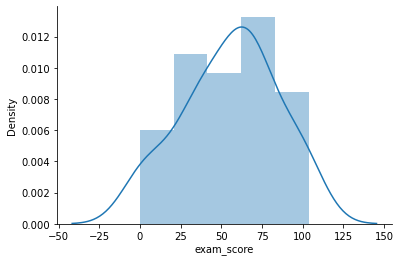

In [11]:
import seaborn as sns

sns.distplot(df.exam_score)
plt.show()

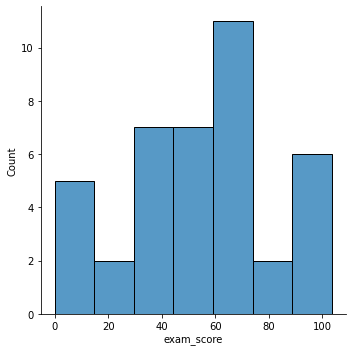

In [12]:
sns.displot(df.exam_score)
plt.show()

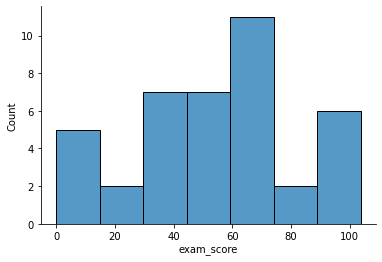

In [13]:
sns.histplot(df.exam_score)
plt.show()

In [14]:
# compare the mean and median
df.exam_score.mean(), df.exam_score.median()

(55.28336550715703, 58.35658448399582)

In [15]:
# close enough to normal for our purposes

# formula to find test statistic
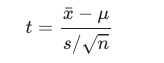

In [16]:
# calculate our t-statistic using python

lefties = df[df.handedness == 'left']

μ = df.exam_score.mean()
xbar = lefties.exam_score.mean()
s = lefties.exam_score.std()
n = lefties.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

0.49180552940467903

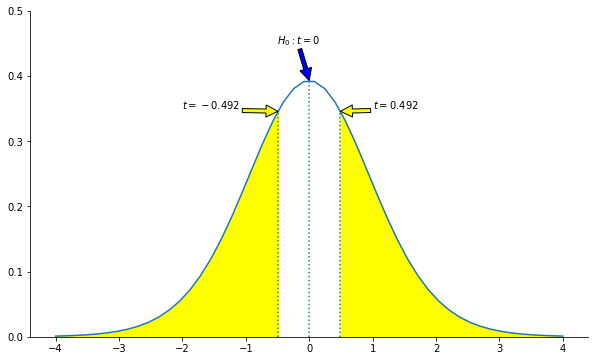

In [17]:
viz.compare_means_example1(df)


In [18]:
p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
p

0.6295357651101651

In [19]:
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.492
p = 0.630


In [20]:
t, p = stats.ttest_1samp(lefties.exam_score, df.exam_score.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.492
p = 0.630


So what is the significance of this result? 

The calculated t-value is greater than the table value at a significance level of 5%. Therefore, it is safe to reject the null hypothesis that there is no difference between means. The population set has intrinsic differences, and they are not by chance.
